In [1]:
import cv2 # opencv library
import os #
import numpy as np
from matplotlib import pyplot as plt # For plotting
import random

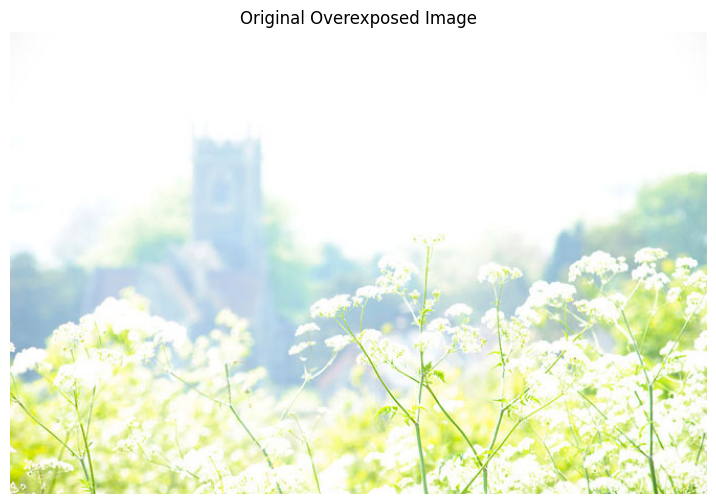

In [13]:
# Load the overexposed image
img = cv2.imread('C:/Users/user/Downloads/Overexposed1.jpg')

# Convert to RGB (OpenCV uses BGR by default)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Display the original image
plt.figure(figsize=(10, 6))
plt.title("Original Overexposed Image")
plt.imshow(img_rgb)
plt.axis('off')
plt.show()


# First I reduce the brightness of the image which done by converting the image to a different color space and adjusting the intensity channel.

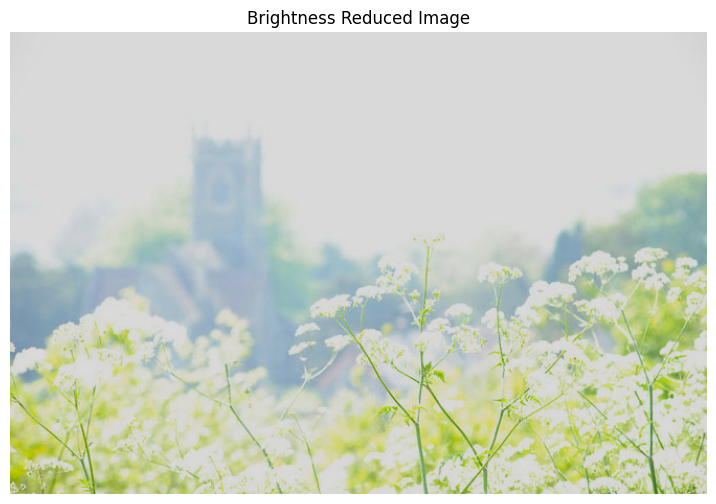

In [37]:
# Convert to HSV color space
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

# Split the channels
h, s, v = cv2.split(img_hsv)

# Decrease the brightness by a factor
v = cv2.multiply(v, 0.85) 

# Merge the channels back
img_hsv = cv2.merge([h, s, v])

# Convert back to BGR color space
img_brightness_adjusted = cv2.cvtColor(img_hsv, cv2.COLOR_HSV2BGR)

# Convert to RGB for display
img_brightness_adjusted_rgb = cv2.cvtColor(img_brightness_adjusted, cv2.COLOR_BGR2RGB)

# Display the brightness-adjusted image
plt.figure(figsize=(10, 6))
plt.title("Brightness Reduced Image")
plt.imshow(img_brightness_adjusted_rgb)
plt.axis('off')
plt.show()


# After reducing the brightness,  contrast enhancement is applied to bring out the details that may still be washed out. The image is converted to the LAB color space, where the L channel represents lightness. Contrast Limited Adaptive Histogram Equalization (CLAHE) is applied to the L channel to enhance the contrast without amplifying noise.

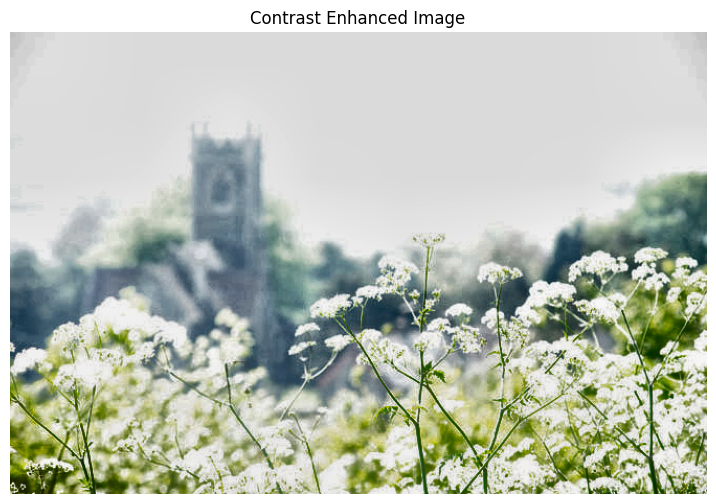

In [38]:
# Convert to LAB color space
img_lab = cv2.cvtColor(img_brightness_adjusted, cv2.COLOR_BGR2LAB)

# Split the LAB image into channels
l, a, b = cv2.split(img_lab)

# Apply CLAHE (Contrast Limited Adaptive Histogram Equalization) to L-channel
clahe = cv2.createCLAHE(clipLimit=5.0, tileGridSize=(8, 8))
l_clahe = clahe.apply(l)

# Merge the CLAHE enhanced L-channel back with A and B channels
img_lab_clahe = cv2.merge([l_clahe, a, b])

# Convert back to BGR color space
img_clahe = cv2.cvtColor(img_lab_clahe, cv2.COLOR_LAB2BGR)

# Convert to RGB for display
img_clahe_rgb = cv2.cvtColor(img_clahe, cv2.COLOR_BGR2RGB)

# Display the contrast-enhanced image
plt.figure(figsize=(10, 6))
plt.title("Contrast Enhanced Image")
plt.imshow(img_clahe_rgb)
plt.axis('off')
plt.show()


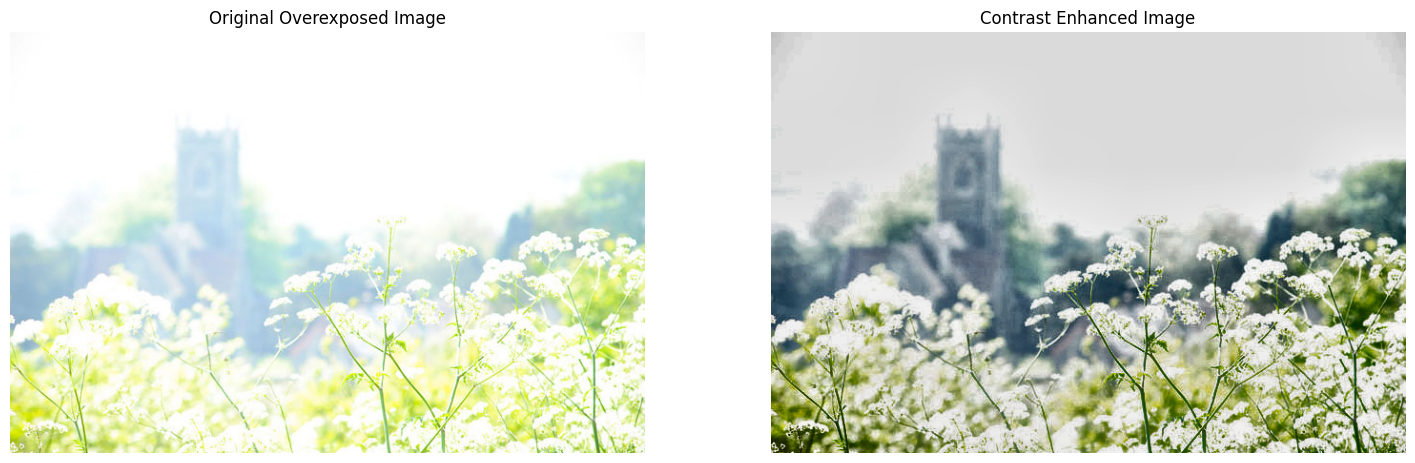

In [43]:
# Display the original and contrast-enhanced images side by side
plt.figure(figsize=(18, 6))

plt.subplot(1, 2, 1)
plt.imshow(img_rgb)
plt.title("Original Overexposed Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(img_clahe_rgb)
plt.title("Contrast Enhanced Image")
plt.axis('off')

plt.show()

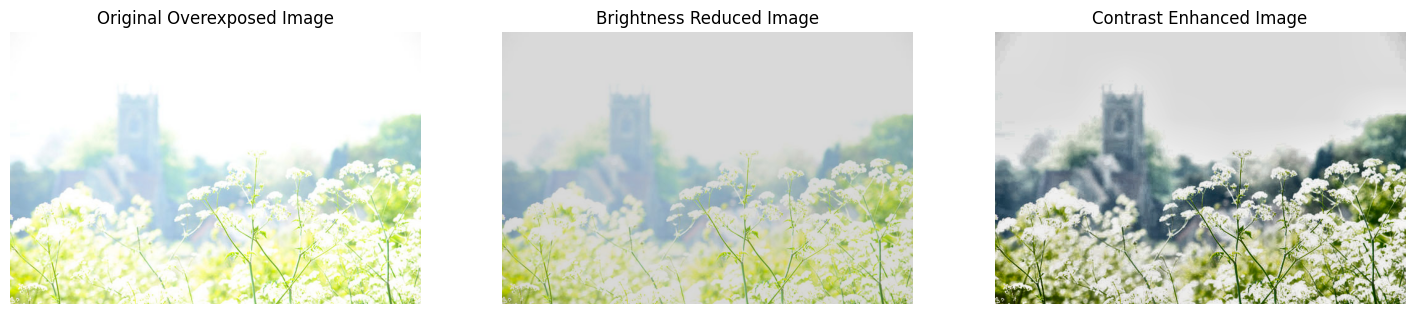

In [39]:
# Display the original, brightness-adjusted, and contrast-enhanced images side by side
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
plt.imshow(img_rgb)
plt.title("Original Overexposed Image")
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(img_brightness_adjusted_rgb)
plt.title("Brightness Reduced Image")
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(img_clahe_rgb)
plt.title("Contrast Enhanced Image")
plt.axis('off')

plt.show()
